# ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í≤∞Í≥º Î≥¥Í≥† (sklearn)

## #01. Ï§ÄÎπÑÏûëÏóÖ

### [1] Ìå®ÌÇ§ÏßÄ Ï∞∏Ï°∞

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from tabulate import tabulate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú Î™®Îìà
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import t, f
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

### [2] Í∑∏ÎûòÌîÑ Ï¥àÍ∏∞Ìôî

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/fish.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Í∏∏Ïù¥      56 non-null     float64
 1   ÎÜíÏù¥      56 non-null     float64
 2   ÎëêÍªò      56 non-null     float64
 3   Î¨¥Í≤å      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None


Í∏∏Ïù¥    ÎÜíÏù¥    ÎëêÍªò    Î¨¥Í≤å
0   8.4  2.11  1.41   5.9
1  13.7  3.53  2.00  32.0
2  15.0  3.82  2.43  40.0
3  16.2  4.59  2.63  51.5
4  17.4  4.59  2.94  70.0

## #02. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### [1] ÎèÖÎ¶ΩÎ≥ÄÏàò(Îì§)Ïùò Ïù¥Î¶ÑÍ≥º Ï¢ÖÏÜçÎ≥ÄÏàòÏùò Ïù¥Î¶ÑÏùÑ Î≥ÄÏàòÏóê Ï†ÄÏû•

In [4]:
yname = 'Î¨¥Í≤å'
xnames = list(origin.drop(yname, axis=1).columns)

### [2] ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨

Ïù¥Ï†Ñ ÏòàÏ†úÏôÄ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌï†ÏùÄ ÏàòÌñâÌïòÏßÄ ÏïäÏùå

In [5]:
x = origin[xnames]   # ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Î∂ÑÎ¶¨
y = origin[yname]    # Ï¢ÖÏÜçÎ≥ÄÏàòÎäî ÏãúÎ¶¨Ï¶à ÌòïÌÉúÎ°ú Î∂ÑÎ¶¨

## #03. ÌöåÍ∑ÄÎ∂ÑÏÑù

ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàÑÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ§Î™ÖÎ†•ÏùÄ ÏñªÏùÑ Ïàò ÏóÜÎã§.

Î¨¥Í≤å = 2.908 * Í∏∏Ïù¥ + 67.205 * ÎÜíÏù¥ + 67.260 * ÎëêÍªò + -546.440
+-------------------------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |     0.942303 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |    62.5758   |
| ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)             |  6847.54     |
| ÌèâÍ∑†Ïò§Ï∞®(RMSE)                |    82.7499   |
| ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   124.554    |
| ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)           |    97.1079   |
+-------------------------------+--------------+



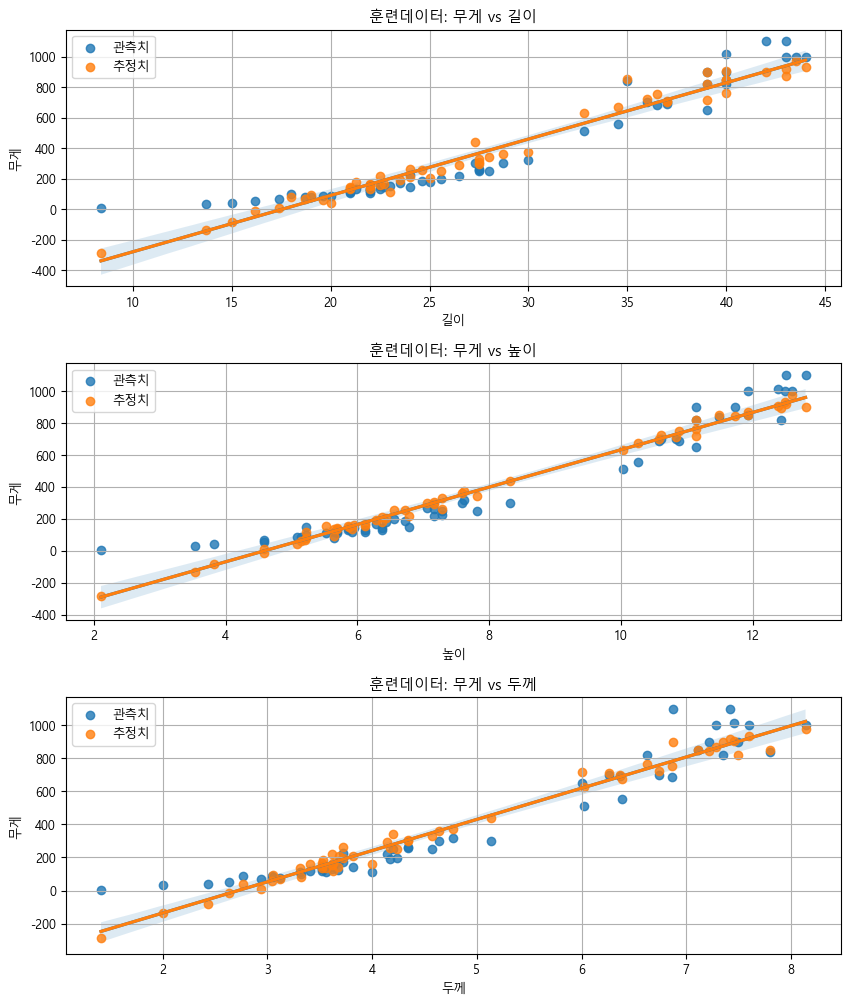

In [6]:
xnames = x.columns
size = len(xnames)

# Î∂ÑÏÑùÎ™®Îç∏ ÏÉùÏÑ±
model = LinearRegression()
fit = model.fit(x, y)

# ÌöåÍ∑ÄÏãù
expr = "{yname} = ".format(yname=yname)

for i, v in enumerate(xnames):
    expr += "%0.3f * %s + " % (fit.coef_[i], v)

expr += "%0.3f" % fit.intercept_
print(expr)

# Ï∂îÏ†ïÏπò ÏÉùÏÑ±
y_pred = fit.predict(x)

# ÏÑ±Îä•ÌèâÍ∞Ä
result1 = {
    "Í≤∞Ï†ïÍ≥ÑÏàò(R2)": r2_score(y, y_pred),
    "ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)": mean_absolute_error(y, y_pred),
    "ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)": mean_squared_error(y, y_pred),
    "ÌèâÍ∑†Ïò§Ï∞®(RMSE)": np.sqrt(mean_squared_error(y, y_pred)),
    "ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE)": np.mean(np.abs((y - y_pred) / y) * 100),
    "ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)": np.mean((y - y_pred) / y * 100)
}

result_df = DataFrame([result1], index=["ÌõàÎ†®Îç∞Ïù¥ÌÑ∞"])
print(tabulate(result_df.T, headers='keys', tablefmt='psql', showindex=True), end="\n\n")


# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(len(xnames), 1, figsize=(10, 4*size), dpi=100)
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(xnames):
    sb.regplot(x=x[v], y=y, ci=95, ax=ax[i], label='Í¥ÄÏ∏°Ïπò')
    sb.regplot(x=x[v], y=y_pred, ci=0, ax=ax[i], label='Ï∂îÏ†ïÏπò')
    ax[i].set_title(f"ÌõàÎ†®Îç∞Ïù¥ÌÑ∞: {yname} vs {v}")
    ax[i].legend()
    ax[i].grid(True)

plt.show()
plt.close()

## #04. Í≤∞Í≥ºÎ≥¥Í≥†

### [1] ÌÜµÍ≥ÑÎüâÍ≥º p-value

#### (1) Ï†àÌé∏Í≥º Í≥ÑÏàòÎ•º ÌïòÎÇòÏùò Î∞∞Ïó¥Î°ú Í≤∞Ìï©

In [7]:
params = np.append(fit.intercept_, fit.coef_)
params

array([-546.43979144,    2.9082713 ,   67.20469902,   67.26029602])

#### (2) ÎèÖÎ¶ΩÎ≥ÄÏàòÏóê ÏÉÅÏàòÌï≠ Ï∂îÍ∞ÄÌïòÍ∏∞

In [8]:
designX = x.copy()

# 0Î≤àÏß∏ ÌïÑÎìúÏóê 'ÏÉÅÏàò'ÎùºÎäî Ïù¥Î¶ÑÏùò Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Í∞íÏùÄ 1Î°ú ÏÑ§Ï†ïÌï®
designX.insert(0, 'ÏÉÅÏàò', 1)

designX.head()

ÏÉÅÏàò    Í∏∏Ïù¥    ÎÜíÏù¥    ÎëêÍªò
0   1   8.4  2.11  1.41
1   1  13.7  3.53  2.00
2   1  15.0  3.82  2.43
3   1  16.2  4.59  2.63
4   1  17.4  4.59  2.94

#### (3) ÌñâÎ†¨Í≥± Íµ¨ÌïòÍ∏∞

In [9]:
dot = np.dot(designX.T,designX)
dot

array([[   56.    ,  1562.    ,   440.28  ,   265.75  ],
       [ 1562.    , 48045.12  , 13688.339 ,  8270.876 ],
       [  440.28  , 13688.339 ,  3917.2114,  2365.5425],
       [  265.75  ,  8270.876 ,  2365.5425,  1434.4117]])

#### (4) ÌñâÎ†¨Í≥±Ïùò Ïó≠ÌñâÎ†¨

In [10]:
inv = np.linalg.inv(dot)
inv

array([[ 0.25997581, -0.02937614,  0.05587393,  0.02907514],
       [-0.02937614,  0.00811062, -0.0207489 , -0.00710593],
       [ 0.05587393, -0.0207489 ,  0.11758923, -0.08463348],
       [ 0.02907514, -0.00710593, -0.08463348,  0.17585582]])

#### (5) Ïó≠ÌñâÎ†¨Ïùò ÎåÄÍ∞ÅÏÑ† Î∞òÌôò

In [11]:
dia = inv.diagonal()
dia

array([0.25997581, 0.00811062, 0.11758923, 0.17585582])

#### (6) ÌèâÍ∑† Ï†úÍ≥±Ïò§Ï∞® Íµ¨ÌïòÍ∏∞

sklearnÏùò APIÎäî ÏÉÅÏàòÌï≠Ïù¥ Í≥†Î†§ÎêòÏßÄ ÏïäÏùÄ MSE Íµ¨ÌïúÎã§.

ÏÉÅÏàòÌï≠Ïù¥ Ï†ÅÏö©Îêú Í≤ΩÏö∞Ïù¥ÎØÄÎ°ú APIÎ•º ÌÜµÌïú Í∞íÏù¥ ÏïÑÎãå ÏßÅÏ†ë Íµ¨Ìïú Í∞íÏù¥ ÌïÑÏöîÌïòÎã§

In [12]:
predictions = fit.predict(x)
MSE = (sum((y-predictions)**2)) / (len(designX)-len(designX.iloc[0]))
MSE

7374.273394715794

#### (7) ÌëúÏ§ÄÏò§Ï∞®

In [13]:
se_b = np.sqrt(MSE * dia)
se_b

array([43.78507388,  7.73368804, 29.44715768, 36.0112326 ])

#### (8) t-value Íµ¨ÌïòÍ∏∞

In [14]:
ts_b = params / se_b
ts_b

array([-12.48004726,   0.37605232,   2.28221344,   1.86775878])

#### (9) p-value Íµ¨ÌïòÍ∏∞

In [15]:
p_values = [2*(1-t.cdf(np.abs(i),(len(designX)-len(designX.iloc[0])))) for i in ts_b]
p_values

[0.0, 0.7084079152880327, 0.026597717787692154, 0.06743585337091651]

### [2] VIF Íµ¨ÌïòÍ∏∞

In [16]:
vif = []

for i, v in enumerate(xnames):
    j = list(origin.columns).index(v)
    vif.append(variance_inflation_factor(origin, j))

vif

[338.76030542544714, 500.757055790855, 263.01505845905143]

### [3] ÌëúÏ§ÄÌôî Í≥ÑÏàò(Î≤†ÌÉÄ) Íµ¨ÌïòÍ∏∞

ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÌëúÏ§ÄÌôî Ìïú ÌõÑ Î®∏Ïã†Îü¨ÎãùÏùÑ ÏàòÌñâÌïú Í≤ΩÏö∞Ïóê ÎåÄÌïú Í≥ÑÏàòÍ∞í

In [17]:
scaler = StandardScaler()
std = scaler.fit_transform(origin)
std_df = DataFrame(std, columns=origin.columns)
std_df.head()

Í∏∏Ïù¥        ÎÜíÏù¥        ÎëêÍªò        Î¨¥Í≤å
0 -2.180225 -2.016507 -1.896175 -1.092422
1 -1.587434 -1.518703 -1.560774 -1.016660
2 -1.442032 -1.417039 -1.316328 -0.993438
3 -1.307815 -1.147103 -1.202633 -0.960056
4 -1.173599 -1.147103 -1.026405 -0.906355

In [18]:
std_x = std_df[xnames]
std_y = std_df[yname]
std_model = LinearRegression()
std_fit = std_model.fit(std_x, std_y)
beta = std_fit.coef_[0]
beta

0.075477908125361

### [4] Í≤∞Í≥ºÌëú Íµ¨ÏÑ±ÌïòÍ∏∞

In [19]:
result_df = DataFrame({
    "Ï¢ÖÏÜçÎ≥ÄÏàò": [yname] * len(xnames),
    "ÎèÖÎ¶ΩÎ≥ÄÏàò": xnames,
    "B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(params[1:], 4),
    "ÌëúÏ§ÄÏò§Ï∞®": np.round(se_b[1:], 3),
    "Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(beta, 4),
    "t": np.round(ts_b[1:], 4),
    "Ïú†ÏùòÌôïÎ•†": np.round(p_values[1:], 3),
    "VIF": vif,
})

result_df

Ï¢ÖÏÜçÎ≥ÄÏàò ÎèÖÎ¶ΩÎ≥ÄÏàò  B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)    ÌëúÏ§ÄÏò§Ï∞®  Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò)       t   Ïú†ÏùòÌôïÎ•†         VIF
0   Î¨¥Í≤å   Í∏∏Ïù¥      2.9083   7.734     0.0755  0.3761  0.708  338.760305
1   Î¨¥Í≤å   ÎÜíÏù¥     67.2047  29.447     0.0755  2.2822  0.027  500.757056
2   Î¨¥Í≤å   ÎëêÍªò     67.2603  36.011     0.0755  1.8678  0.067  263.015058

### [5] Î∂ÑÏÑù Í≤∞Í≥º Î≥¥Í≥†

#### (1) ÏûîÏ∞® Íµ¨ÌïòÍ∏∞

$Í¥ÄÏ∏°Ïπò - Ï∂îÏ†ïÏπò$

In [20]:
y_pred = fit.predict(x)

# ÏûîÏ∞® Í≥ÑÏÇ∞
resid = y - y_pred
resid[:5]

0    291.271380
1    166.843295
2    122.651252
3     65.461649
4     59.621032
Name: Î¨¥Í≤å, dtype: float64

#### (2) durbin_watson Íµ¨ÌïòÍ∏∞

In [21]:
dw = durbin_watson(resid)
dw

0.4848900475687653

#### (3) ÏÑ§Î™ÖÎ†•($R^2$)

In [22]:
r2 = r2_score(y, y_pred)
r2

0.9423026213750791

#### (4) Î≥¥Ï†ïÎêú $R^2$

In [23]:
# ÌëúÎ≥∏Ïàò
rowcount = len(origin)
rowcount

56

In [26]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò
featurecount = len(xnames)
featurecount

3

In [27]:
adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)
adj_r2

0.9389739264544106

#### (5) Î™®Îç∏Ïóê ÎåÄÌïú F-ÌÜµÍ≥ÑÎüâÍ≥º ÌôïÎ•† Í∞í Í≥ÑÏÇ∞

In [28]:
# F-statistic
f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

# Prob (F-statistic)
p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p:.4g}")

F-statistic: 283.08
p-value: 1.11e-16


#### (6) Í≤∞Í≥ºÎ≥¥Í≥† Î¨∏ÏûêÏó¥

In [29]:
tpl = "ùëÖ^2(%.3f), Adj.ùëÖ^2(%.3f), ùêπ(%.3f), P-value(%.4g), Durbin-Watson(%.3f)"
tpl % (r2, adj_r2, f_statistic, p, dw)

'ùëÖ^2(0.942), Adj.ùëÖ^2(0.939), ùêπ(283.085), P-value(1.11e-16), Durbin-Watson(0.485)'

In [30]:
tpl = "%sÏóê ÎåÄÌïòÏó¨ %sÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú %s(F(%s,%s) = %0.3f, p %s 0.05)."

tpl % (
    yname,
    ",".join(xnames),
    "Ïú†ÏùòÌïòÎã§" if p <= 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÎã§",
    len(x.columns),
    len(x.index)-len(x.columns)-1,
    f_statistic,
    "<=" if p <= 0.05 else ">")

'Î¨¥Í≤åÏóê ÎåÄÌïòÏó¨ Í∏∏Ïù¥,ÎÜíÏù¥,ÎëêÍªòÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(3,52) = 283.085, p <= 0.05).'

### [6] ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†

In [31]:
varstr = []

for n in xnames:
    item = result_df[result_df['ÎèÖÎ¶ΩÎ≥ÄÏàò'] == n]
    coef = float(item['B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)'].values[0])
    pvalue = float(item['Ïú†ÏùòÌôïÎ•†'].values[0])

    s = "%sÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî %0.3f(p %s 0.05)Î°ú, %sÏóê ÎåÄÌïòÏó¨ %s."
    k = s % (n,
             coef,
             "<=" if pvalue <= 0.05 else '>',
             yname,
             'Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§' if pvalue <= 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§'
    )

    varstr.append(k)

varstr

['Í∏∏Ïù¥Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 2.908(p > 0.05)Î°ú, Î¨¥Í≤åÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÎÜíÏù¥Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 67.205(p <= 0.05)Î°ú, Î¨¥Í≤åÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÎëêÍªòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 67.260(p > 0.05)Î°ú, Î¨¥Í≤åÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.']

## #05. Í≤∞Í≥ºÎ≥¥Í≥† ÏùºÍ¥ÑÏ≤òÎ¶¨

In [32]:
target_x = x.copy()
target_y = y.copy()
target_y_pred = fit.predict(target_x)
resid = target_y - target_y_pred

# Ï†àÌé∏Í≥º Í≥ÑÏàòÎ•º ÌïòÎÇòÏùò Î∞∞Ïó¥Î°ú Í≤∞Ìï©
params = np.append(fit.intercept_, fit.coef_)

# Í≤ÄÏ¶ùÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏóê ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
design_x = target_x.copy()
design_x.insert(0, 'ÏÉÅÏàò', 1)

dot = np.dot(design_x.T,design_x)   # ÌñâÎ†¨Í≥±
inv = np.linalg.inv(dot)            # Ïó≠ÌñâÎ†¨
dia = inv.diagonal()                # ÎåÄÍ∞ÅÏõêÏÜå

# Ï†úÍ≥±Ïò§Ï∞®
MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

se_b = np.sqrt(MSE * dia)           # ÌëúÏ§ÄÏò§Ï∞®
ts_b = params / se_b                # tÍ∞í

# Í∞Å ÎèÖÎ¶ΩÏàòÏóê ÎåÄÌïú pvalue
p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

# VIF
vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for i, v in enumerate(target_x.columns)]

# ÌëúÏ§ÄÌôî Í≥ÑÏàò
train_df = target_x.copy()
train_df[target_y.name] = target_y
scaler = StandardScaler()
std = scaler.fit_transform(train_df)
std_df = DataFrame(std, columns=train_df.columns)
std_x = std_df[xnames]
std_y = std_df[yname]
std_model = LinearRegression()
std_fit = std_model.fit(std_x, std_y)
beta = std_fit.coef_

# Í≤∞Í≥ºÌëú Íµ¨ÏÑ±ÌïòÍ∏∞
result_df = DataFrame({
    "Ï¢ÖÏÜçÎ≥ÄÏàò": [yname] * len(xnames),
    "ÎèÖÎ¶ΩÎ≥ÄÏàò": xnames,
    "B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(params[1:], 4),
    "ÌëúÏ§ÄÏò§Ï∞®": np.round(se_b[1:], 3),
    "Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(beta, 3),
    "t": np.round(ts_b[1:], 3),
    "Ïú†ÏùòÌôïÎ•†": np.round(p_values[1:], 3),
    "VIF": vif,
})

#result_df
print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

resid = target_y - target_y_pred        # ÏûîÏ∞®
dw = durbin_watson(resid)               # ÎçîÎπà ÏôìÏä® ÌÜµÍ≥ÑÎüâ
r2 = r2_score(target_y, target_y_pred)  # Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎ†•)
rowcount = len(target_x)                # ÌëúÎ≥∏Ïàò
featurecount = len(target_x.columns)    # ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò

# Î≥¥Ï†ïÎêú Í≤∞Ï†ïÍ≥ÑÏàò
adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

# fÍ∞í
f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

# Prob (F-statistic)
p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

tpl = "ùëÖ^2(%.3f), Adj.ùëÖ^2(%.3f), F(%.3f), P-value(%.4g), Durbin-Watson(%.3f)"
print(tpl % (r2, adj_r2, f_statistic, p, dw), end="\n\n")

# Í≤∞Í≥ºÎ≥¥Í≥†
tpl = "%sÏóê ÎåÄÌïòÏó¨ %sÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú %s(F(%s,%s) = %0.3f, p %s 0.05)."

print(tpl % (
    yname,
    ",".join(xnames),
    "Ïú†ÏùòÌïòÎã§" if p <= 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÎã§",
    len(target_x.columns),
    len(target_x.index)-len(target_x.columns)-1,
    f_statistic,
    "<=" if p <= 0.05 else ">"), end="\n\n")

# ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†
for n in xnames:
    item = result_df[result_df['ÎèÖÎ¶ΩÎ≥ÄÏàò'] == n]
    coef = item['B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)'].values[0]
    pvalue = item['Ïú†ÏùòÌôïÎ•†'].values[0]

    s = "%sÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî %0.3f(p %s 0.05)Î°ú, %sÏóê ÎåÄÌïòÏó¨ %s."
    k = s % (n,
             coef,
             "<=" if pvalue <= 0.05 else '>',
             yname,
             'Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§' if pvalue <= 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§'
    )

    print(k)

+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | Ï¢ÖÏÜçÎ≥ÄÏàò   | ÎèÖÎ¶ΩÎ≥ÄÏàò   |   B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò) |   ÌëúÏ§ÄÏò§Ï∞® |   Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò) |     t |   Ïú†ÏùòÌôïÎ•† |     VIF |
|----+------------+------------+--------------------+------------+------------------+-------+------------+---------|
|  0 | Î¨¥Í≤å       | Í∏∏Ïù¥       |             2.9083 |      7.734 |            0.075 | 0.376 |      0.708 | 230.196 |
|  1 | Î¨¥Í≤å       | ÎÜíÏù¥       |            67.2047 |     29.447 |            0.556 | 2.282 |      0.027 | 413.582 |
|  2 | Î¨¥Í≤å       | ÎëêÍªò       |            67.2603 |     36.011 |            0.343 | 1.868 |      0.067 | 247.585 |
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+

ùëÖ^2(0.942), Adj.ùëÖ^2(0.939), F(283.085), P-value(1.11e-16), Durbin-Watson(0.485)

Î¨¥Í≤åÏóê ÎåÄÌïòÏó¨ Í∏∏Ïù¥,ÎÜíÏù¥,ÎëêÍªòÎ°ú ÏòàÏ∏°Ìïò

## Ï∞∏Í≥†ÏûêÎ£å(Reference)

1) https://m.blog.naver.com/pmw9440/222482746927

2) https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

3) https://stats.stackexchange.com/questions/85943/how-to-derive-the-standard-error-of-linear-regression-coefficient

4) https://calcworkshop.com/linear-regression/t-test/

5) https://www.google.com/url?sa=i&url=http%3A%2F%2Fwww.few.vu.nl%2F~wvanwie%2FCourses%2FHighdimensionalDataAnalysis%2FWNvanWieringen_HDDA_Lecture234_RidgeRegression_20182019.pdf&psig=AOvVaw31slQKGfkCNf2PAa3VEIGC&ust=1630070470635000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIjJworkzvICFQAAAAAdAAAAABAR